In [1]:
packages = !pip list
for x in packages:
    if "qiskit" in x:
        print(x)

qiskit                1.1.0
qiskit-aer            0.14.1
qiskit-ibm-provider   0.11.0
qiskit-ibm-runtime    0.24.0


In [2]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
# from qiskit.tools.jupyter import *
from qiskit.visualization import *
# from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options
token = #put your own token

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum",token = token)

# Invoke a primitive. For more details see https://docs.quantum.ibm.com/run/primitives
# result = Sampler().run(circuits).result()

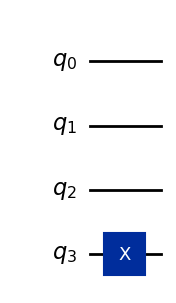

In [3]:
# initialization
import numpy as np
# importing Qiskit
from qiskit import QuantumCircuit, assemble, transpile


# import basic plot tools
from qiskit.visualization import plot_histogram
# set the length of the n-bit input string.
n = 3
# set the length of the n-bit input string.
n = 3
const_oracle = QuantumCircuit(n+1)
output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)
const_oracle.draw('mpl')

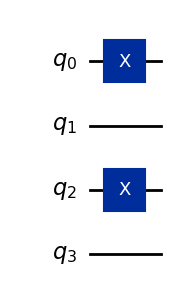

In [4]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"2
balanced_oracle = QuantumCircuit(n+1)

b_str = "101"
# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.draw('mpl')

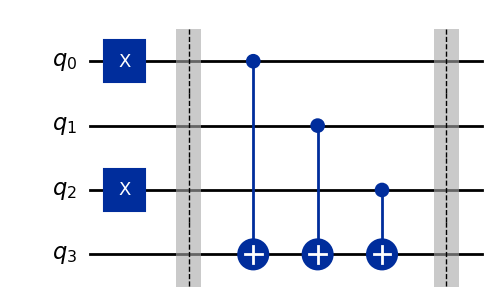

In [5]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"
# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
# Use barrier as divider
balanced_oracle.barrier()
# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)
balanced_oracle.barrier()
balanced_oracle.draw('mpl')

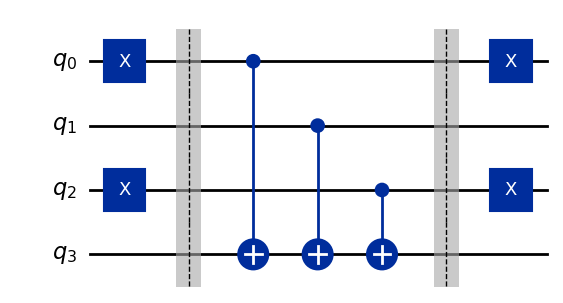

In [6]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"
# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
# Use barrier as divider
balanced_oracle.barrier()
# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)
balanced_oracle.barrier()
# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw('mpl')

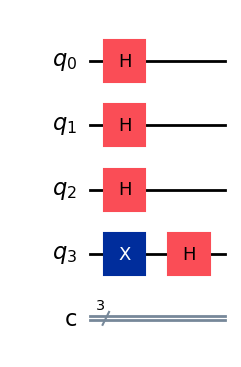

In [7]:
dj_circuit = QuantumCircuit(n+1, n)
# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit.draw('mpl')

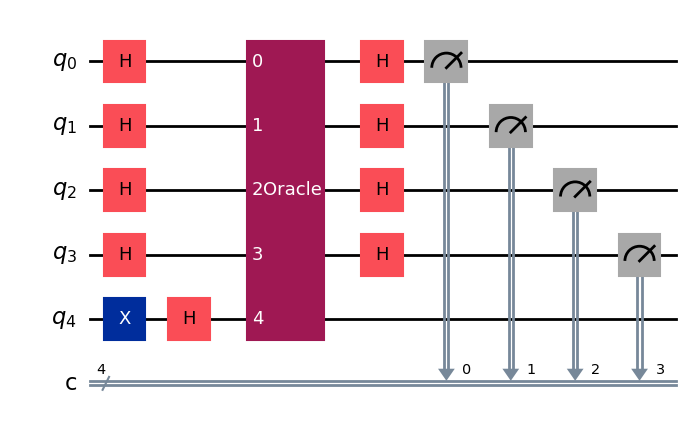

In [8]:
dj_circuit = QuantumCircuit(n+1, n)
# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)
# Add oracle
dj_circuit &= balanced_oracle
dj_circuit.draw()
dj_circuit = QuantumCircuit(n+1, n)
# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)
# Add oracle
dj_circuit &= balanced_oracle

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()
# Measure
for i in range(n):
    dj_circuit.measure(i, i)
# Display circuit
dj_circuit.draw()
# use local simulator
from qiskit_aer import Aer
from qiskit import transpile
backend = Aer.get_backend('aer_simulator')

qobj = transpile(dj_circuit, backend)
results = backend.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    for i in range(n):
        dj_circuit.measure(i, i)
    return dj_circuit

n = 4
oracle_gate = dj_oracle('balanced', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw('mpl')

C:\Users\NFSBM\AppData\Local\Temp\ipykernel_25476\2704936909.py:3: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = backend.run(qobj).result()


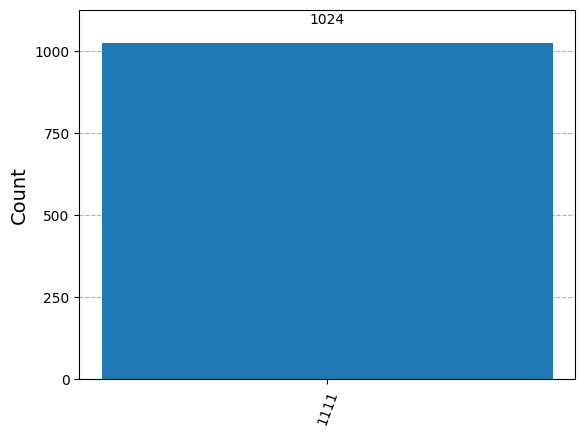

In [9]:
transpiled_dj_circuit = transpile(dj_circuit, backend)
qobj = assemble(transpiled_dj_circuit)
results = backend.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

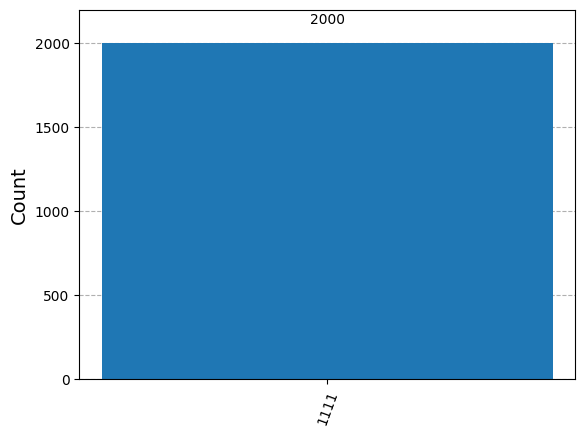

In [10]:
transpiled_dj_circuit = transpile(dj_circuit,backend)
from qiskit_aer import Aer
backend = Aer.get_backend('aer_simulator')
transpiled_dj_circuit = transpile(dj_circuit,backend,optimization_level = 3)
job = backend.run(transpiled_dj_circuit,shots = 2000)
print(job)
results = job.result()
answer = results.get_counts()
plot_histogram(answer)

C:\Users\NFSBM\AppData\Local\Temp\ipykernel_25476\754850797.py:6: DeprecationWarning: The Sampler and Estimator V1 primitives have been deprecated as of qiskit-ibm-runtime 0.23.0 and will be removed no sooner than 3 months after the release date. Please use the V2 Primitives. See the `V2 migration guide <https://docs.quantum.ibm.com/api/migration-guides/v2-primitives>`_. for more details
  sampler = Sampler(session=session)


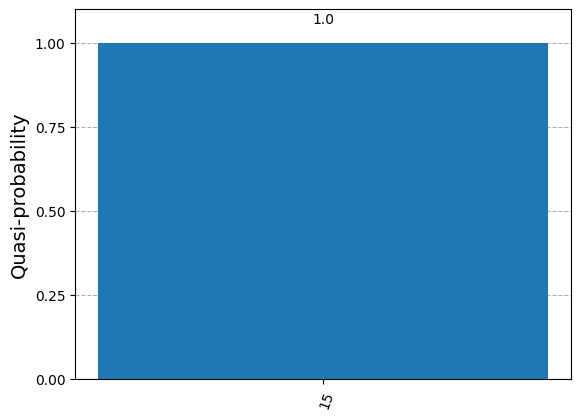

In [11]:
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import session
aer_sim = AerSimulator()
aer_sim.set_max_qubits(4)
with Session(backend=aer_sim) as session:
    sampler = Sampler(session=session)
    result = sampler.run([dj_circuit],optimization_level=3).result()
hist1 = plot_histogram(result.quasi_dists, sort='value_desc')
hist1

In [12]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
# from qiskit.tools.monitor import job_monitor
from qiskit_ibm_provider import IBMProvider
IBMProvider.save_account(token, overwrite=True)
provider = IBMProvider()
list = provider.backends()
print("backends available: ", list)
# provider = IBMQ.get_provider(hub='ibm-q')
# backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >=(n+1) and not x.configuration().simulator and x.status().operational==True))
# job_monitor(job, interval=2)

backends available:  [<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyoto')>, <IBMBackend('ibm_osaka')>, <IBMBackend('ibm_sherbrooke')>]


In [13]:
l = service.least_busy()

In [14]:
print(l.name)
print(l.num_qubits)

ibm_kyoto
127


In [15]:
print(service.backends(min_num_qubits=n+1))

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyoto')>, <IBMBackend('ibm_osaka')>, <IBMBackend('ibm_sherbrooke')>]


In [16]:
# backend = provider.get_backend('ibm_kyoto')
backend = provider.get_backend(l.name)
transpiled_dj_circuit = transpile(dj_circuit,backend,optimization_level=3)
job = backend.run(transpiled_dj_circuit,shots = 2000)
print(job)

<IBMCircuitJob('ct22fdnjyjyg008sva00')>


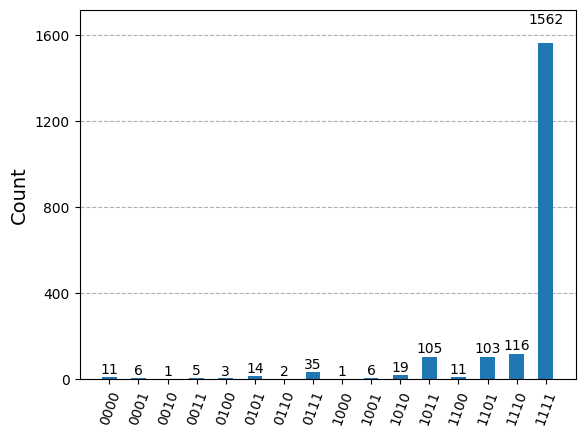

In [17]:
results = job.result()
answer = results.get_counts()
plot_histogram(answer)